In [42]:
import pandas as pd
from pathlib import Path
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from contextlib import contextmanager

In [11]:
df_mis = pd.read_csv("data/misconception_mapping.csv")
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_sub = pd.read_csv("data/sample_submission.csv")

In [5]:
df_train.sample(3)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
1678,1678,2737,"Given the distance travelled, complete missing...",269,"Speed, Distance, Time",C,Work out the speed \( v \) if the distance tra...,\( 100 \mathrm{mph} \),\( 50 \mathrm{mph} \),\( 25 \mathrm{mph} \),\( 12.5 \mathrm{mph} \),509.0,NaN,NaN,790.0
88,88,2303,Calculate the volume of other prisms when the ...,189,Volume of Prisms,D,![A triangular based prism]() Tom likes to rem...,\( 5 \mathrm{~mm} \),\( 7 \mathrm{~mm} \),\( 10 \mathrm{~mm} \),\( 15 \mathrm{~mm} \),2091.0,NaN,NaN,NaN
25,25,1872,Calculate speed where distance and time are in...,67,Substitution into Formula,A,The formula for speed is\n\(\n\text { Speed }=...,\( 0.4 \) metres per hour,\( 40 \) metres per hour,\( 2.5 \) metres per hour,\( 4 \) metres per hour,NaN,509.0,2359.0,NaN


In [6]:
print("num samples:", df_train.shape)

num samples: (1869, 15)


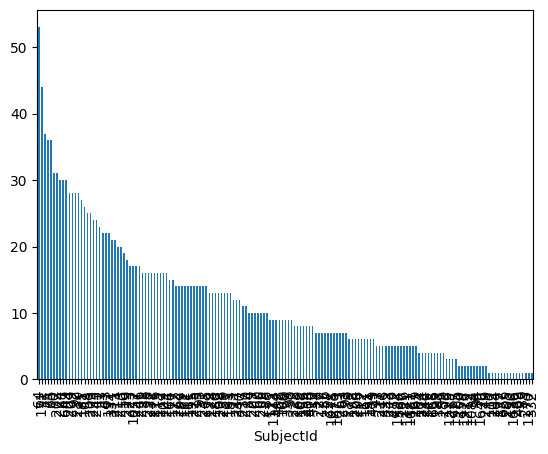

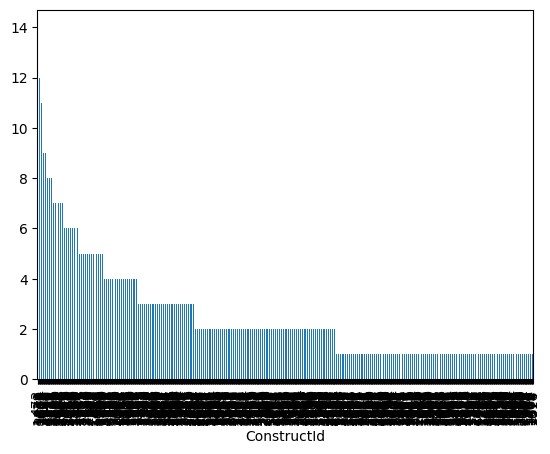

In [7]:
df_train["SubjectId"].value_counts().plot(kind="bar"); plt.show()
df_train["ConstructId"].value_counts().plot(kind="bar"); plt.show()


In [67]:
with pd.option_context("display.max_colwidth", None):
    display(df_train[df_train["SubjectName"] == "BIDMAS"].head(11))


,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
223,223,3119,Use brackets to write function machines as calculations,33,BIDMAS,B,Here is a function machine\n\( input\Rightarrow +2 \Rightarrow \times 3 \Rightarrow output\)\nThe input is \( 5 \).\nWhich calculation gives the correct output?,\( 5 \times 3+2 \),\( 3(5+2) \),\( 5(3+2) \),\( 5+2 \times 3 \),77.0,NaN,2270.0,2532.0
304,304,855,Use the order of operations to carry out calculations involving brackets,33,BIDMAS,C,\[\n1+2 \times(3-4)=\n\]\n\nWhich calculation should you do first?,\( 1+2 \),\( 2 \times 3 \),\( 3-4 \),It doesn't matter: you get the same answer,1507.0,2488.0,NaN,2532.0
306,306,854,"Use the order of operations to carry out calculations involving addition, subtraction, multiplication, and/or division",33,BIDMAS,B,Problem P: \( 4-5+6= \)\nProblem Q: \( 4+5 \times 6= \)\n\nWhich calculation should you do first in each problem?,Problem P: \( 4-5 \)\nProblem Q: \( 4+5 \),Problem P: \( 4-5 \)\nProblem Q: \( 5 \times 6 \),Problem P: \( 5+6 \)\nProblem Q: \( 4+5 \),Problem P: \( 5+6 \)\nProblem Q: \( 5 \times 6 \),1507.0,NaN,1516.0,2306.0
329,329,325,Answer decimal problems that require the use of BIDMAS,33,BIDMAS,A,Tom and Katie are discussing the order of operations\nTom says: \( 0.1-0.2 \div 0.3 \equiv 0.1-(0.2 \div 0.3) \)\nKatie says: \( 0.1-0.2 \div 0.3 \equiv 0.2 \div 0.3-0.1 \)\nWho is correct?,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,NaN,1507.0,1963.0,1507.0
361,361,71,Solve problems that combine addition and subtraction,33,BIDMAS,A,"![Think of a number, then subtract \( 5 \), next divide by \( 8 \), next add 4, and finally multiply by \( 7 \).]() Jo says you can write this as:\n\[\n7\left(\frac{(n-5)}{8}+4\right)\n\]\nPaul says you can write this as:\n\[\n7((n-5) \div 8)+4\n\]\nWho is correct?",Only\nJo,Only\nPaul,Both Jo and Paul,Neither is correct,NaN,NaN,NaN,1507.0
435,435,284,Answer negative number problems that require the use of BIDMAS,33,BIDMAS,B,Which calculation is equal to \( -20 \) ?,\( 2 \times(-2)-(-4) \times 4 \),\( -28-(-4) \times 2 \),\( (-5)^{2}+5 \),\( (-42) \div(-2)+1 \),1805.0,NaN,1597.0,1400.0
507,507,1470,"Solve two-step linear equations, with the variable on one side, with all positive integers",33,BIDMAS,C,"\( a, b \) and \( c \) are different numbers\n\(\n\frac{a}{b+c}=a \div(b+c)\n\)\nIs the above relationship...",never true,sometimes true,always true,Need more information,1316.0,1316.0,NaN,1316.0
550,550,854,"Use the order of operations to carry out calculations involving addition, subtraction, multiplication, and/or division",33,BIDMAS,C,Tom and Katie are discussing the order of operations\nTom says: \( 3+2-1 \equiv 3-1+2 \)\nKatie says: \( 3+2 \times 1 \equiv 2 \times 1+3 \),Only\nTom,Only Katie,Both Tom and Katie,Neither is correct,328.0,1507.0,NaN,NaN
587,587,854,"Use the order of operations to carry out calculations involving addition, subtraction, multiplication, and/or division",33,BIDMAS,D,Problem P: \( 6 \div 3+5= \)\nProblem Q: \( 6 \div 3 \times 5= \)\n\nWhich calculation should you do first in each problem?,Problem P: \( 3+5 \)\nProblem Q: \( 3 \times 5 \),Problem P: \( 3+5 \)\nProblem Q: \( 6 \div 3 \),Problem P: \( 6 \div 3 \)\nProblem Q: \( 3 \times 5 \),Problem P: \( 6 \div 3 \)\nProblem Q: \( 6 \div 3 \),706.0,15.0,2306.0,NaN


In [71]:
df_test

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct


In [70]:
with pd.option_context("display.max_colwidth", None):
    display(df_mis[df_mis["MisconceptionId"] == 15])

,MisconceptionId,MisconceptionName
15,15,"Confuses the order of operations, believes addition comes before division"


In [37]:
18 / 2+2 * 2

13.0

In [12]:
df_mis

,MisconceptionId,MisconceptionName
0,0,Does not know that angles in a triangle sum to...
1,1,Uses dividing fractions method for multiplying...
2,2,Believes there are 100 degrees in a full turn
3,3,Thinks a quadratic without a non variable term...
4,4,Believes addition of terms and powers of terms...
...,...,...
2582,2582,"When multiplying numbers with the same base, m..."
2583,2583,Does not know what a cube number is
2584,2584,Believes that any percentage of a larger numbe...
2585,2585,Believes a cubic expression should have three ...


In [25]:
misc_dict = {k: set() for k in range(len(df_mis))}
for i, row in df_train.iterrows():
    for letter in ["A", "B", "C", "D"]:
        m = f"Misconception{letter}Id"
        if np.isnan(row[m]):
            continue
        misc_dict[int(row[m])].add(row["SubjectId"])

In [27]:
misc_dict[50]

set()

In [4]:
row = df_train.sample()
print(row)
ipd.Markdown(row["QuestionText"].values[0].replace("\\", "\\\\"))

     QuestionId  ConstructId  \
559         559         3207   

                                         ConstructName  SubjectId  \
559  Understand the terms equilateral and regular, ...         84   

                SubjectName CorrectAnswer                       QuestionText  \
559  Properties of Polygons             A  An equilateral shape must have...   

         AnswerAText                     AnswerBText    AnswerCText  \
559  All sides equal  All sides and all angles equal  A right angle   

          AnswerDText  MisconceptionAId  MisconceptionBId  MisconceptionCId  \
559  All angles equal               NaN             527.0             527.0   

     MisconceptionDId  
559             527.0  


An equilateral shape must have...

In [5]:
ipd.Math("\\cdot")

<IPython.core.display.Math object>

In [6]:
row["QuestionText"]

559    An equilateral shape must have...
Name: QuestionText, dtype: object

In [7]:
df_misc.sample(10)

,MisconceptionId,MisconceptionName
2443,2443,Thinks y = ? is the x axis
995,995,Believes the lowest common multiple is found m...
2241,2241,Confuses triangular prism with pyramid
402,402,Does not know the definition of a cone
2562,2562,Confuses the lower and upper bound
2225,2225,Thinks signs are interchangeable when adding o...
289,289,Writes the numerator and the denominator the w...
2147,2147,Believes they should multiply each numerator b...
960,960,Divides by the index
749,749,"When asked to subtract a fraction from a unit,..."
